# Machine Learning - Linear Regression on Boston Housing Dataset

## Data Background and Problem Statement
https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.Open-source ML library for Python. Built on NumPy, SciPy, and Matplotlib. ... Scikit-learn is a library in Python that provides many unsupervised and supervised learning algorithms.

# Task 1 : Environment Set up

In [2]:
#import required libraries
import numpy as np
import pandas as pd

# Task 2 : Data Collection

In [3]:
# import the boston dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
# create a pandas dataframe and store the data
df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston.columns


Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [5]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
# append Price, target, as a new columnn to the dataset
df_boston['Price'] = boston_dataset.target

In [7]:
# print top 5 observations
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


We want first to check to see if we have missing data ,we use isnull().sum()

In [8]:
df_boston.isnull().sum() #sum to count of the NaN values For one column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [9]:
df_boston["Price"].mean()

22.532806324110698

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


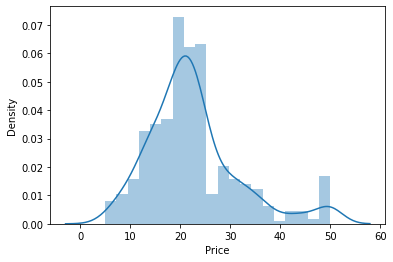

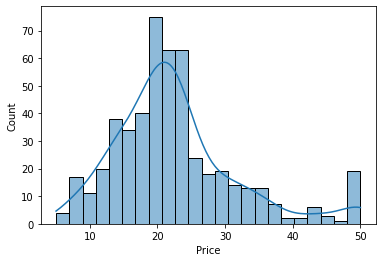

In [11]:
#sns.set(rc={'figure.figsize':(12,12)})#. rc parameter set aesthetics of your plots 
# set figure size by passing dictionary to rc parameter with key 'figure.figsize' in seaborn set method:
sns.distplot(df_boston['Price'], bins=20)
plt.show()
sns.histplot(df_boston['Price'], kde = True)
plt.show()

#  Create a correlation matrix that measures the linear relationships between the variables
# A perfect negative correlation is represented by the value -1.0, while a 0 indicates no correlation, and +1.0 indicates a perfect positive correlation. A perfect negative correlation means the relationship that exists between two variables is exactly opposite all of the time.


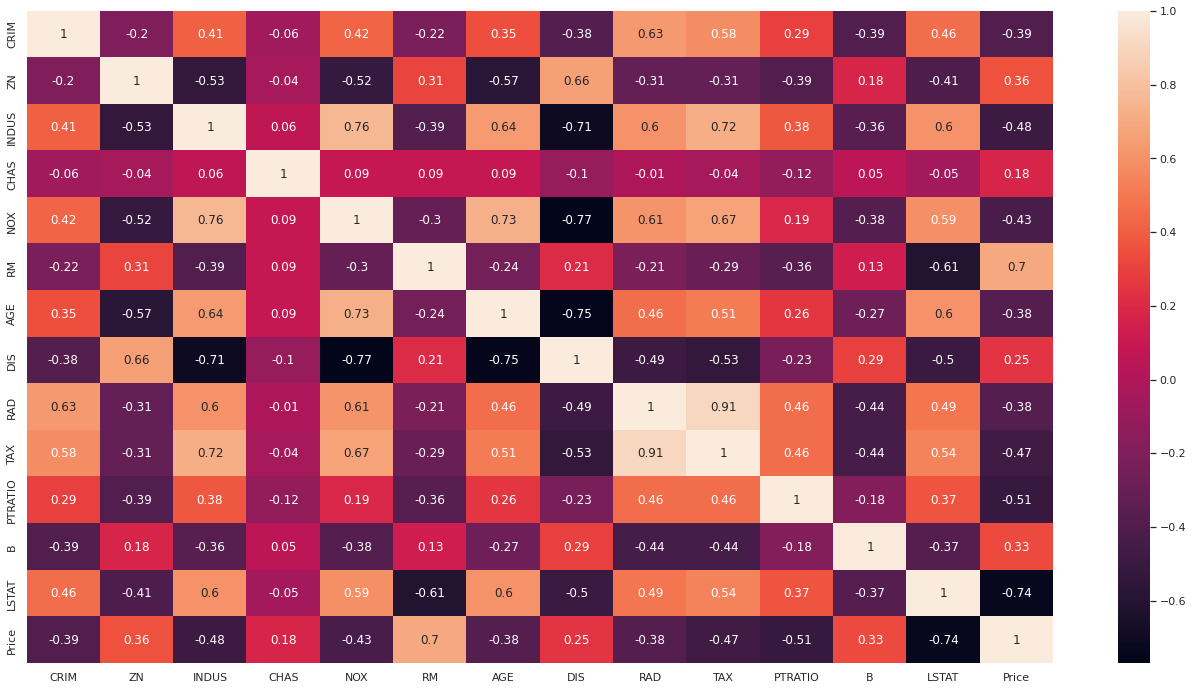

In [28]:
correlation_matrix = df_boston.corr().round(2)
#A correlation matrix is a table showing correlation coefficients between variables.
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix,annot=True)# put the numbers on
sns.set(rc = {'figure.figsize':(23,12)})


# Write Your Observations

The correlation between TAX and RAD is 0.91, which indicates that there is a strong positive correlation between them. It means the better accessibility to radial highways, the higher property-tax rate.

There is a negative correlation between DIS and NOX, which is -0.77. It is reasonable because as the distances to five Boston employment centres get greater, nitric oxides concentration should be lower.

Another observation is that there is a negative correlation between CRIM and Price, which is -0.39. It is reasonalbe that when the per capita crime rate is high, the price should be low, but the correlation is not very strong.

# Preparing the data for training the Machine Learning Model

In [13]:
# assign features on X axis 
X_features = boston_dataset.data

In [14]:
# assign target on Y axis 
Y_target = boston_dataset.target

# Build Linear Regression Model

In [15]:
# import linear model - the estimator
from sklearn.linear_model import LinearRegression
lineReg = LinearRegression()

In [16]:
# fit data into the the estimator
lineReg.fit(X_features,Y_target)

LinearRegression()

In [17]:
# The simple linear regression model is essentially a linear equation of the form y = c + b*x; 
#where y is the dependent variable (outcome), x is the independent variable (predictor), b is the
# slope of the line;
# also known as regression coefficient and c is the intercept; labeled as constant.
print('the estimated intercept %.2f '%lineReg.intercept_)

the estimated intercept 36.46 


In [18]:
# Regression coefficients The Regression Coefficient is the constant 'b' in the regression equation 
#that tells about the change in the value of dependent variable corresponding to the unit change in 
#the independent variable.y = -3.6 + 5.0X 1 - 1.8X 2, the variables X 1 and X 2 are multiplied by 5.0 and -1.8, 
#respectively, so the coefficients are 5.0 and -1.8
# print the coefficient 
print('the coefficient is %d ' %len(lineReg.coef_))

the coefficient is 13 


# Model Training

In [19]:
# train model split the whole dataset into train and test datasets
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target)
X_train, X_test, Y_train, Y_test = train_test_split(X_features,Y_target, train_size=0.80, test_size = 0.2, random_state=15)

In [20]:
# print the dataset shape
print(boston_dataset.data.shape)

(506, 13)


In [21]:
# Print shapes of the training and testing data sets
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(404, 13) (102, 13) (404,) (102,)


In [22]:
# fit the training sets into the model
lineReg.fit(X_train,Y_train)

LinearRegression()

# Caluclate RMSE and R Square:

# RMSE
Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

# R Square

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination,the higher r means ,the higher percentage of points the line passes through when the data points and line are plotted. If the coefficient is 0.80, then 80% of the points should fall within the regression line.The usefulness of R2 is its ability to find the likelihood of future events falling within the predicted outcomes. 


https://drive.google.com/file/d/1YPzOS2dbKIuVOuYWhCeP9HOs0WcWxGaK/view?usp=sharing


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
y_train_predict = lineReg.predict(X_train)

In [25]:
rmse = np.sqrt(mean_squared_error(Y_train,y_train_predict))

In [26]:
#The usefulness of R2 is its ability to find the likelihood of future
# events falling within the predicted outcomes.
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
#RMSE is a measure of how spread out these residuals are.
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")
#an R-Squared value of 0.9 would indicate that 90% of the variance of the dependent-
#-variable being studied is explained by the variance of the independent variable.
#R^2 is explaining the relationship between dependent and independent variables. The high R^2 indicates that the dependents variables are well explained with independent variables.

The model performance for training set
--------------------------------------
RMSE is 4.6767075260099835
R2 score is 0.7455344405641732




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


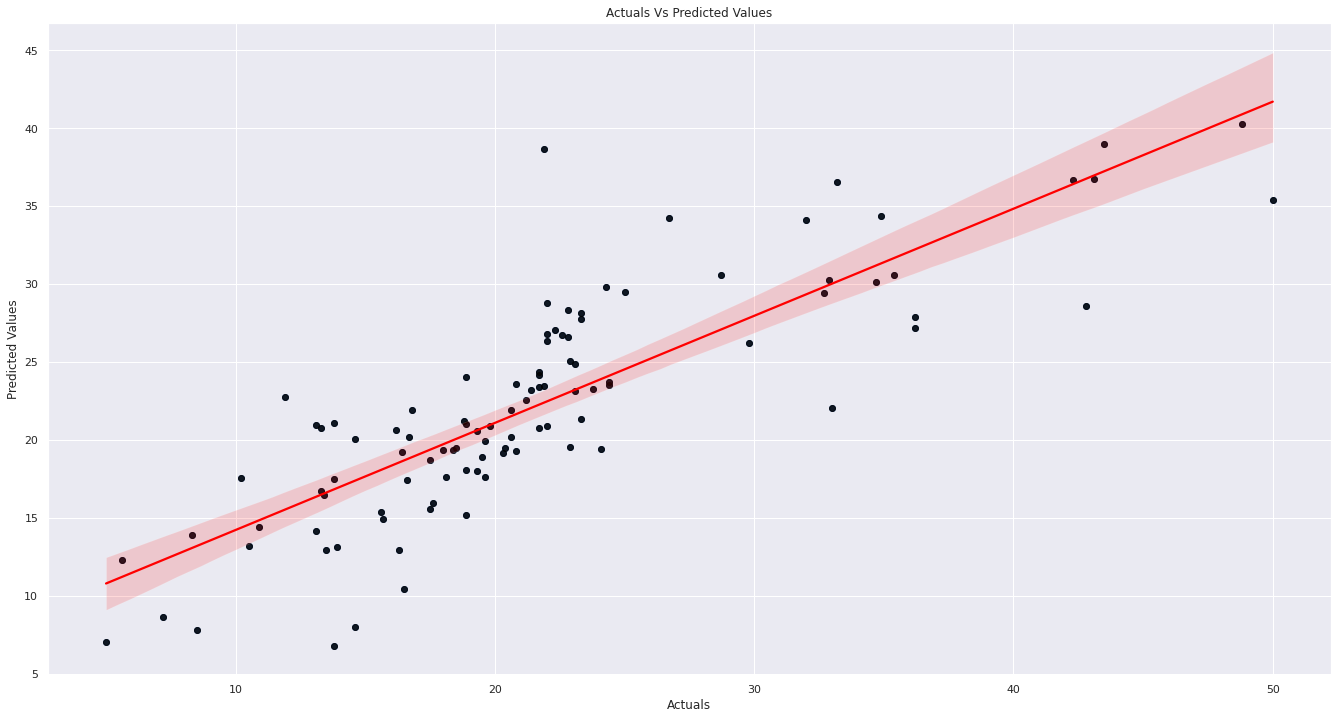

In [27]:
import pandas as pd
import seaborn as sns
# plotting the y_test vs y_pred
# ideally should have been a straight line

y_test_predict = lineReg.predict(X_test)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
scatter= plt.scatter(Y_test, y_test_predict)
regplot=sns.regplot(Y_test, y_test_predict,x="Y_test", 
                    y="y_test_predict", data=scatter,
                 scatter_kws={"color": "black"}, line_kws={"color": "red"})

# Your Conclusion 

RMSE is about 4.677, which indicates that the residuals do not spread out a lot. In other words, the data is concentrated around the regression line.

R Square is around 0.746, which tells us that 74.6% of the points should fall within the regression line. It means the likelihood of future events falling within the predicted outcomes is strong.